In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv("patient_data.csv")
df=pd.DataFrame(d)
print(df)

   patient_id  age        date  sugar_level   bp  income gender  height  \
0        P101   45  2026-01-10          110  120   55000      M     175   
1        P102   32  2026-01-12          145  135   42000      F     162   
2        P103   67  2026-01-15          180  150   31000      M     180   
3        P104   24  2026-01-15           95  110   62000      F     158   
4        P105   51  2026-01-18          130  140   75000      M     170   
5        P106   38  2026-01-20          105  118   58000      F     165   
6        P107   42  2026-01-22          155  130   49000      M     182   
7        P108   29  2026-01-25         2000  115   53000      F     160   
8        P109   73  2026-01-26          210  160   28000      M     174   
9        P110   55  2026-01-28          125  145   82000      F     168   
10       P111   47  2026-02-01          115  125   60000      M     178   
11       P112   35  2026-02-03          140  132   45000      F     155   
12       P113   62  2026-

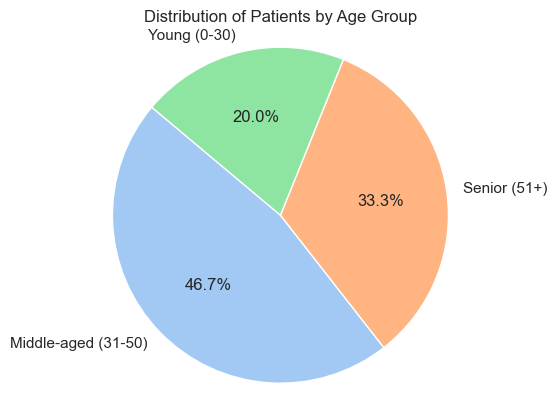

In [7]:
bins = [0, 30, 50, 100]
labels = ['Young (0-30)', 'Middle-aged (31-50)', 'Senior (51+)']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
data = df['age_group'].value_counts()
colors = sns.color_palette('pastel')[0:len(data)]
# Pie chart
plt.pie(data, labels=data.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients by Age Group')
plt.axis('equal')  
plt.show()

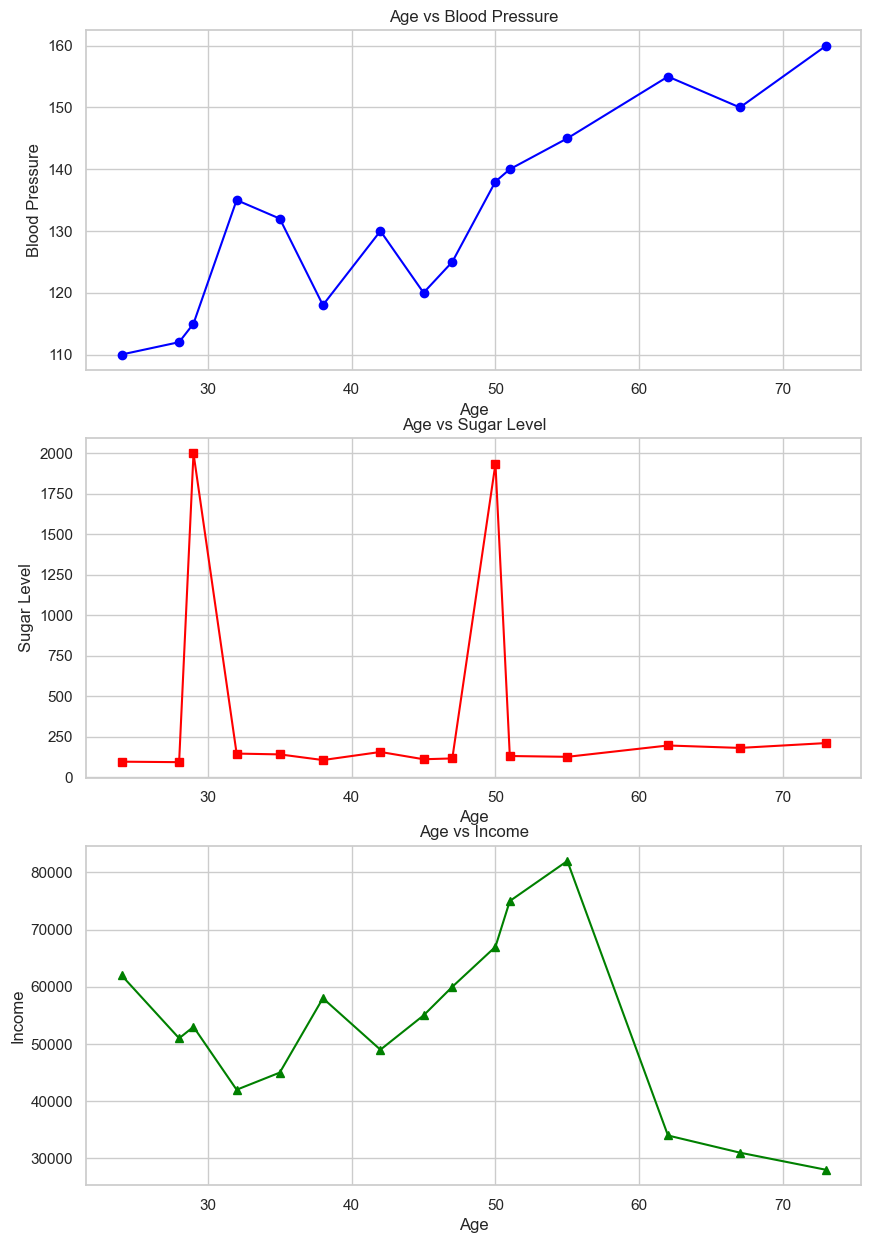

In [31]:
df = df.sort_values('age')
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# Age vs Blood Pressure
axes[0].plot(df['age'], df['bp'], color='blue', marker='o')
axes[0].set_title('Age vs Blood Pressure')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Blood Pressure')
# Age vs Sugar Level
axes[1].plot(df['age'], df['sugar_level'], color='red', marker='s')
axes[1].set_title('Age vs Sugar Level')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Sugar Level')
# Age vs Income
axes[2].plot(df['age'], df['income'], color='green', marker='^')
axes[2].set_title('Age vs Income')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Income')
plt.show()

In [19]:
cols_to_norm = ['age', 'height', 'sugar_level', 'bp', 'income']
for col in cols_to_norm:
    df[f'norm_{col}'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print(df[['age', 'norm_age', 'height', 'norm_height', 'sugar_level', 'norm_sugar_level','income','norm_income']])

    age  norm_age  height  norm_height  sugar_level  norm_sugar_level  income  \
0    45  0.428571     175     0.740741          110          0.009434   55000   
1    32  0.163265     162     0.259259          145          0.027778   42000   
2    67  0.877551     180     0.925926          180          0.046122   31000   
3    24  0.000000     158     0.111111           95          0.001572   62000   
4    51  0.551020     170     0.555556          130          0.019916   75000   
5    38  0.285714     165     0.370370          105          0.006813   58000   
6    42  0.367347     182     1.000000          155          0.033019   49000   
7    29  0.102041     160     0.185185         2000          1.000000   53000   
8    73  1.000000     174     0.703704          210          0.061845   28000   
9    55  0.632653     168     0.481481          125          0.017296   82000   
10   47  0.469388     178     0.851852          115          0.012055   60000   
11   35  0.224490     155   

Text(0.5, 1.0, 'Normalized Income')

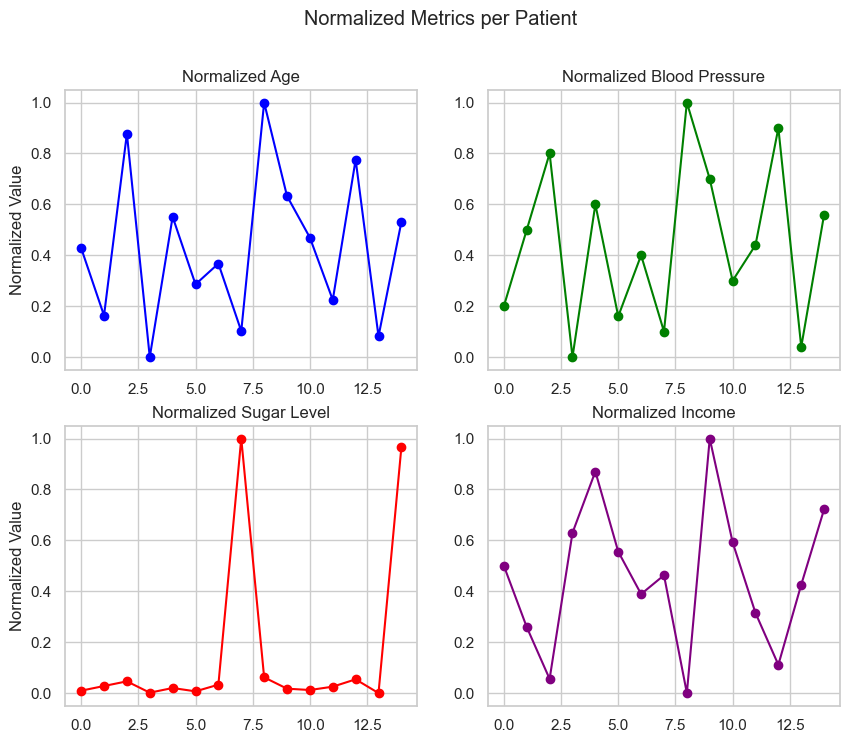

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Normalized Metrics per Patient')
#  Normalized Age
axs[0, 0].plot(df.index, df['norm_age'], marker='o', color='blue')
axs[0, 0].set_title('Normalized Age')
axs[0, 0].set_ylabel('Normalized Value')
#  Normalized BP
axs[0, 1].plot(df.index, df['norm_bp'], marker='o', color='green')
axs[0, 1].set_title('Normalized Blood Pressure')
#  Normalized Sugar Level
axs[1, 0].plot(df.index, df['norm_sugar_level'], marker='o', color='red')
axs[1, 0].set_title('Normalized Sugar Level')
axs[1, 0].set_ylabel('Normalized Value')
# Normalized Income
axs[1, 1].plot(df.index, df['norm_income'], marker='o', color='purple')
axs[1, 1].set_title('Normalized Income')
